# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './2nd-ML100Days/data/home-credit-default-risk/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
# pandas.DataFrame 0.24.2 documentation, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
app_train.head()

Path of read in data: ./2nd-ML100Days/data/home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#app_train.columns #列出app_train dataframe資料中的欄位名稱與欄位數量
app_train.dtypes #列出所有欄位的名稱與資料型別
#app_train.select_dtypes(include=['int64','float64']) # 指定列出int64,float64這兩種資料型態的資料
#app_train.select_dtypes(include=['int64','float64']).columns.values #將欄位名稱轉成陣列
#參考 HomeCredit_columns_description.csv 的欄位說明
describ_data = os.path.join(dir_data, 'HomeCredit_columns_description.csv')
pd.read_csv(describ_data,encoding='latin1')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [6]:
'''
觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

預計採用的步驟是
1.以數值型資料為主，先篩選出數值型資料
2.將數值變化較少的欄位排除，如1~5個
3.將該資料以箱型圖的方式畫出，找出outlier的數值

1. 先篩選數值型的欄位
方法有兩種，
－利用list比對的方式過濾
－直接用select_dtypes的方法直接篩選

method 1
dtype_select = [np.dtype('int64'), np.dtype('float64')]
x = list(app_train.dtypes.isin(dtype_select))
print(x)
numeric_columns = list(app_train.columns[x])
'''
#method 2
#YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
#dtype_select =['float64','int64']
numeric_columns = app_train.select_dtypes(include='number').columns.values
print("數值型資料的欄位數共有 %d 個" % len(numeric_columns))

數值型資料的欄位數共有 106 個


In [7]:
'''
2.將數值變化較少的欄位排除，題目原來提供的是刪掉只有兩個數字的，我延伸成刪掉四個數字以下的欄位
再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
'''
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())>=5 ))])
print("Numbers of remain columns is %d" % len(numeric_columns))


Numbers of remain columns is 71


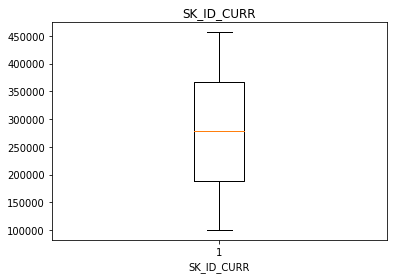

draw boxplot in column  SK_ID_CURR


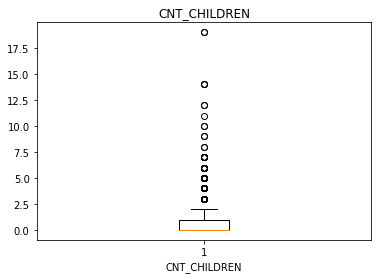

draw boxplot in column  CNT_CHILDREN


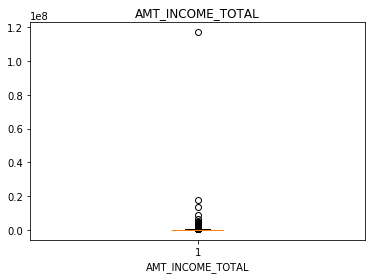

draw boxplot in column  AMT_INCOME_TOTAL


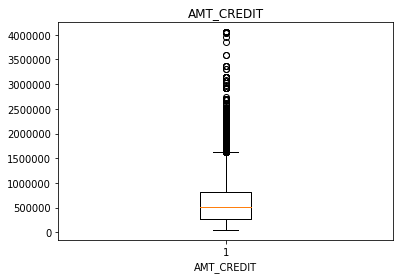

draw boxplot in column  AMT_CREDIT


D:\Users\yehch\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
D:\Users\yehch\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
D:\Users\yehch\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
D:\Users\yehch\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
D:\Users\yehch\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


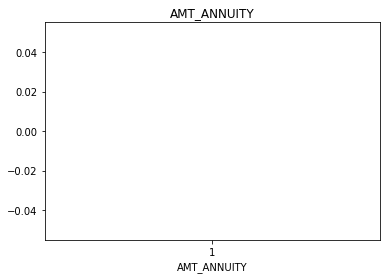

draw boxplot in column  AMT_ANNUITY


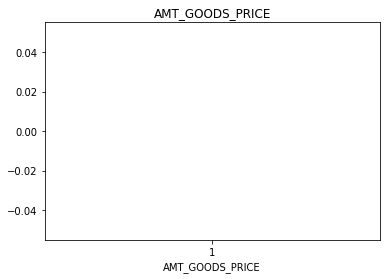

draw boxplot in column  AMT_GOODS_PRICE


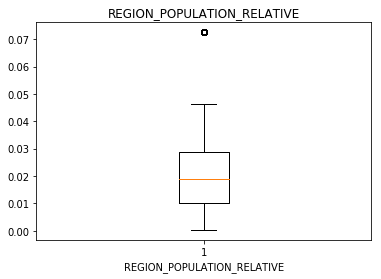

draw boxplot in column  REGION_POPULATION_RELATIVE


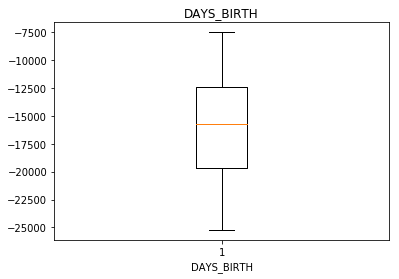

draw boxplot in column  DAYS_BIRTH


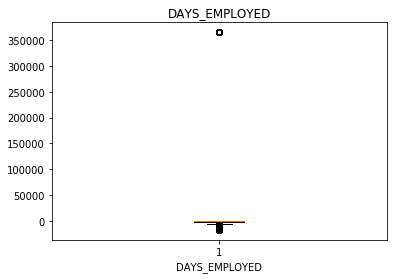

draw boxplot in column  DAYS_EMPLOYED


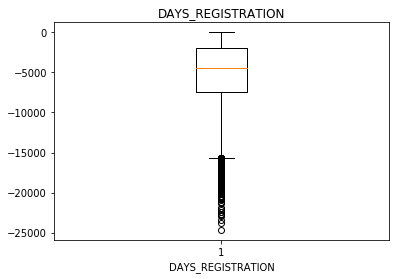

draw boxplot in column  DAYS_REGISTRATION


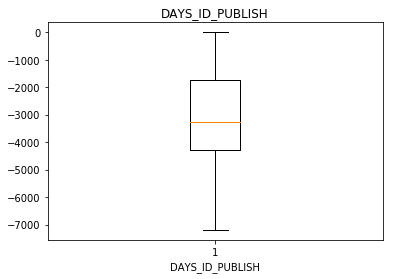

draw boxplot in column  DAYS_ID_PUBLISH


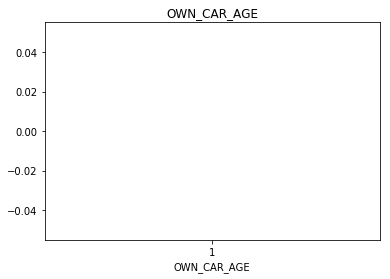

draw boxplot in column  OWN_CAR_AGE


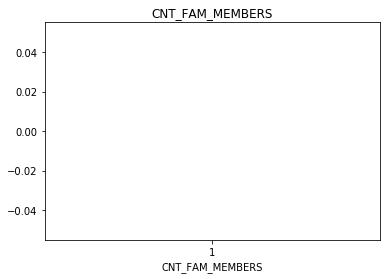

draw boxplot in column  CNT_FAM_MEMBERS


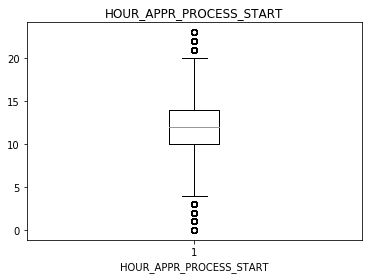

draw boxplot in column  HOUR_APPR_PROCESS_START


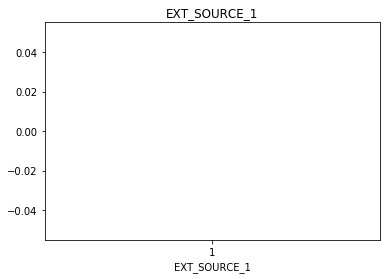

draw boxplot in column  EXT_SOURCE_1


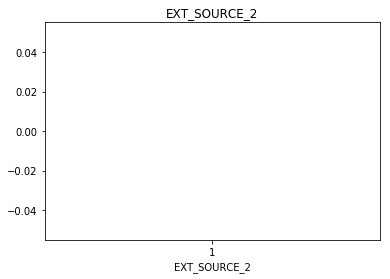

draw boxplot in column  EXT_SOURCE_2


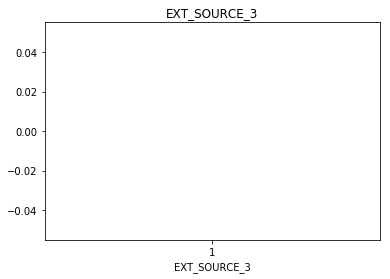

draw boxplot in column  EXT_SOURCE_3


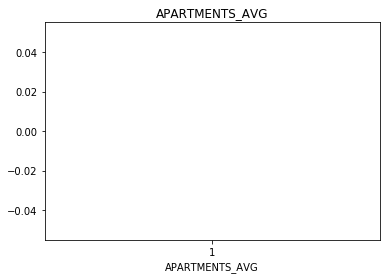

draw boxplot in column  APARTMENTS_AVG


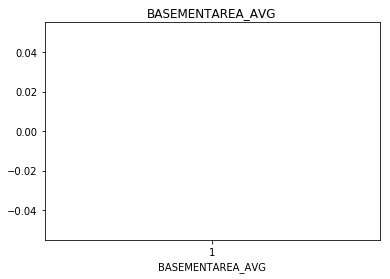

draw boxplot in column  BASEMENTAREA_AVG


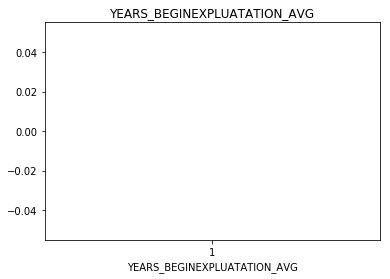

draw boxplot in column  YEARS_BEGINEXPLUATATION_AVG


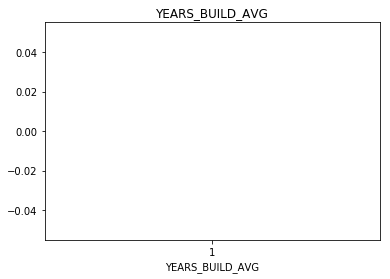

draw boxplot in column  YEARS_BUILD_AVG


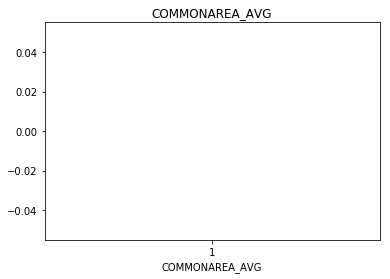

draw boxplot in column  COMMONAREA_AVG


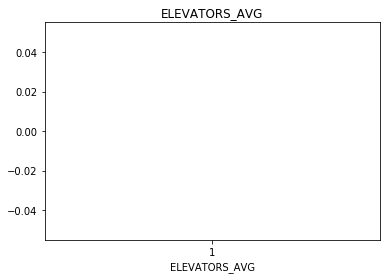

draw boxplot in column  ELEVATORS_AVG


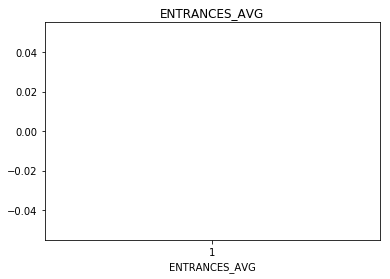

draw boxplot in column  ENTRANCES_AVG


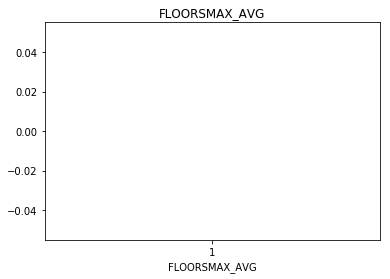

draw boxplot in column  FLOORSMAX_AVG


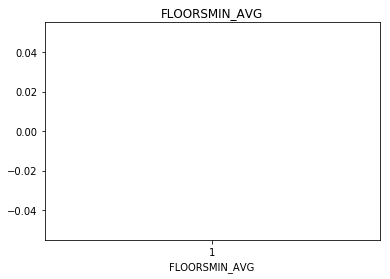

draw boxplot in column  FLOORSMIN_AVG


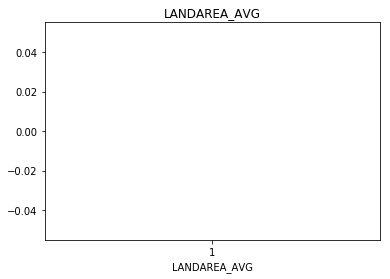

draw boxplot in column  LANDAREA_AVG


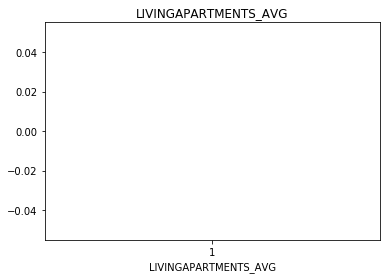

draw boxplot in column  LIVINGAPARTMENTS_AVG


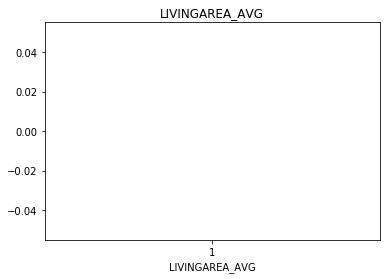

draw boxplot in column  LIVINGAREA_AVG


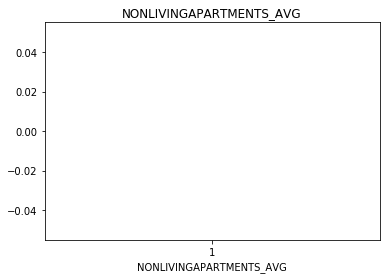

draw boxplot in column  NONLIVINGAPARTMENTS_AVG


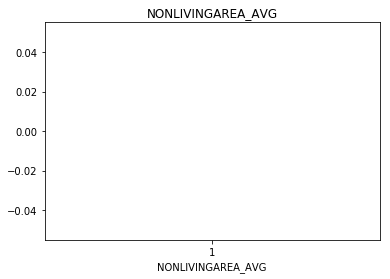

draw boxplot in column  NONLIVINGAREA_AVG


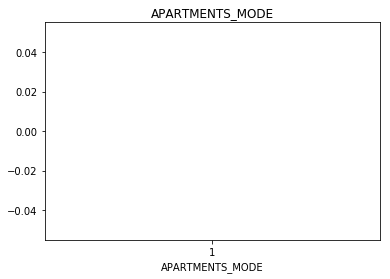

draw boxplot in column  APARTMENTS_MODE


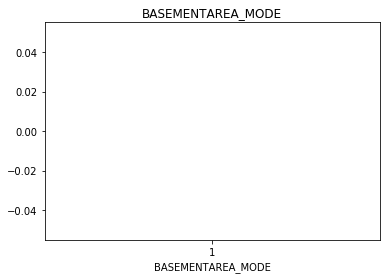

draw boxplot in column  BASEMENTAREA_MODE


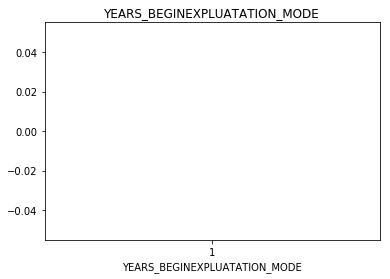

draw boxplot in column  YEARS_BEGINEXPLUATATION_MODE


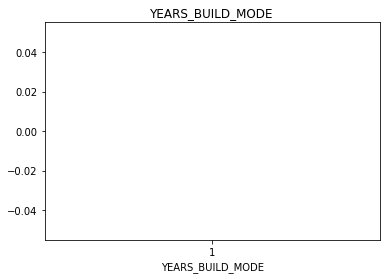

draw boxplot in column  YEARS_BUILD_MODE


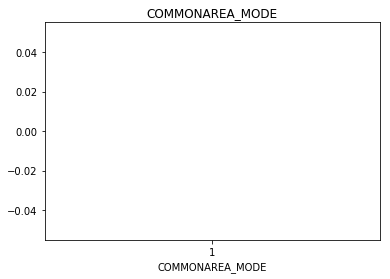

draw boxplot in column  COMMONAREA_MODE


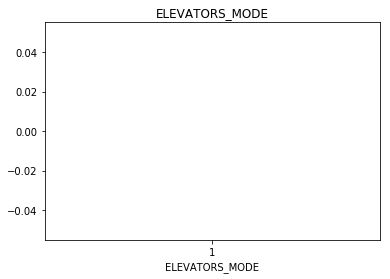

draw boxplot in column  ELEVATORS_MODE


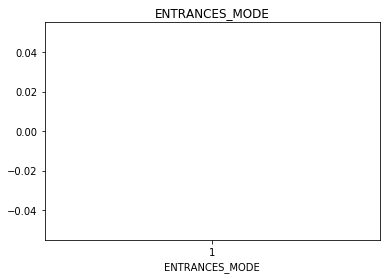

draw boxplot in column  ENTRANCES_MODE


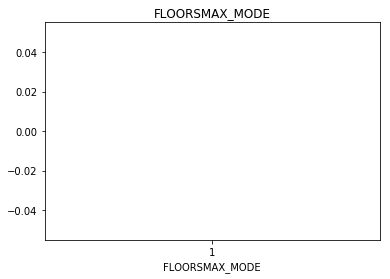

draw boxplot in column  FLOORSMAX_MODE


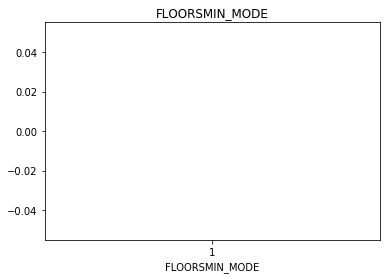

draw boxplot in column  FLOORSMIN_MODE


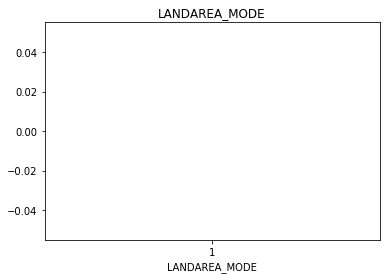

draw boxplot in column  LANDAREA_MODE


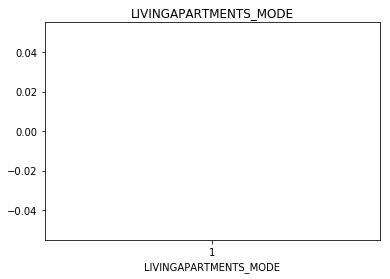

draw boxplot in column  LIVINGAPARTMENTS_MODE


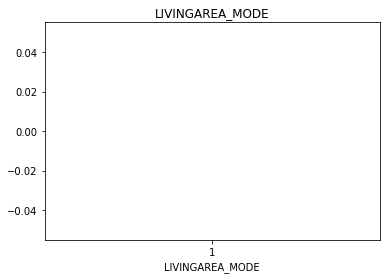

draw boxplot in column  LIVINGAREA_MODE


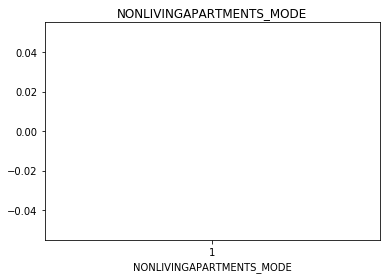

draw boxplot in column  NONLIVINGAPARTMENTS_MODE


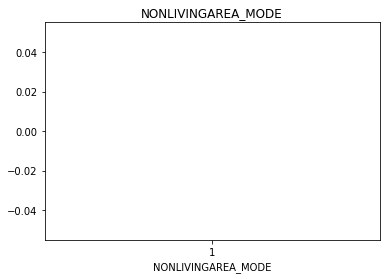

draw boxplot in column  NONLIVINGAREA_MODE


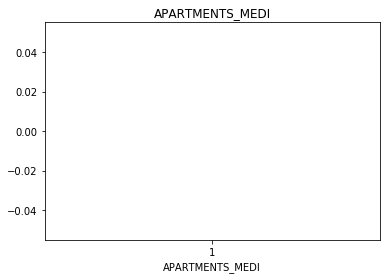

draw boxplot in column  APARTMENTS_MEDI


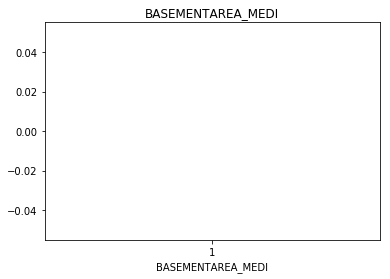

draw boxplot in column  BASEMENTAREA_MEDI


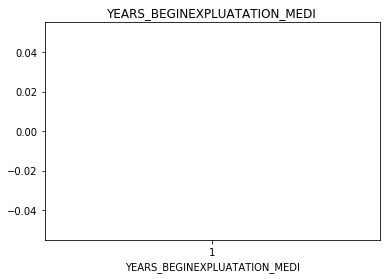

draw boxplot in column  YEARS_BEGINEXPLUATATION_MEDI


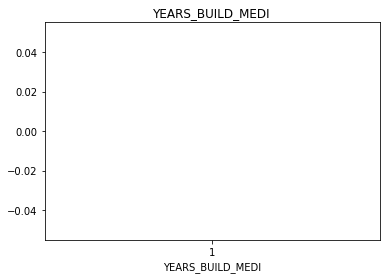

draw boxplot in column  YEARS_BUILD_MEDI


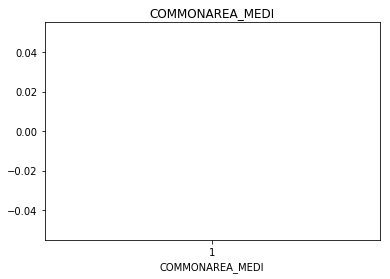

draw boxplot in column  COMMONAREA_MEDI


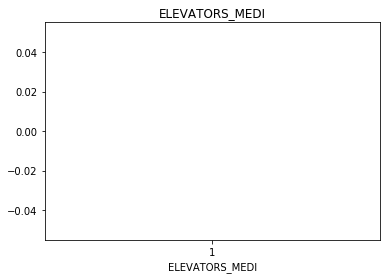

draw boxplot in column  ELEVATORS_MEDI


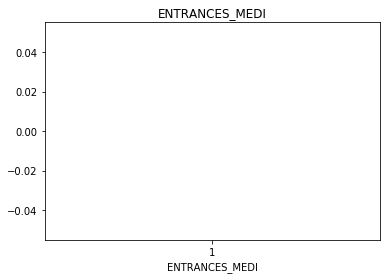

draw boxplot in column  ENTRANCES_MEDI


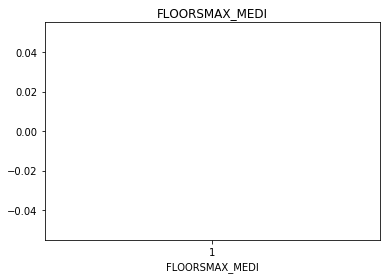

draw boxplot in column  FLOORSMAX_MEDI


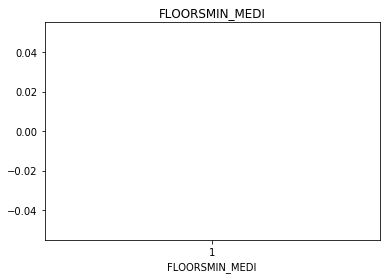

draw boxplot in column  FLOORSMIN_MEDI


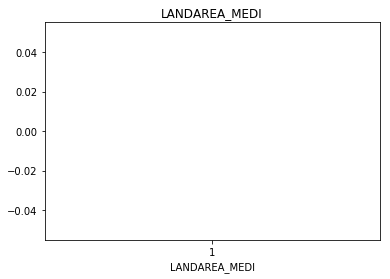

draw boxplot in column  LANDAREA_MEDI


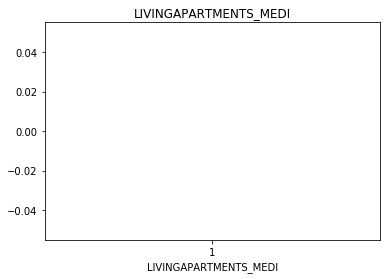

draw boxplot in column  LIVINGAPARTMENTS_MEDI


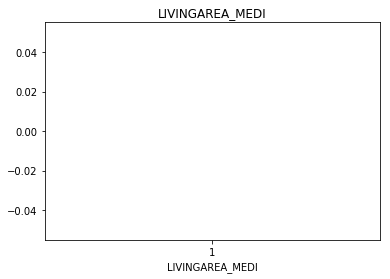

draw boxplot in column  LIVINGAREA_MEDI


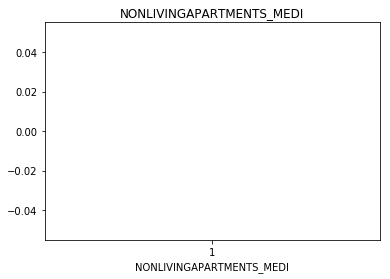

draw boxplot in column  NONLIVINGAPARTMENTS_MEDI


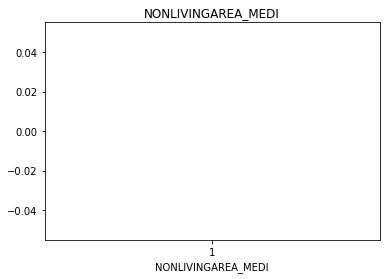

draw boxplot in column  NONLIVINGAREA_MEDI


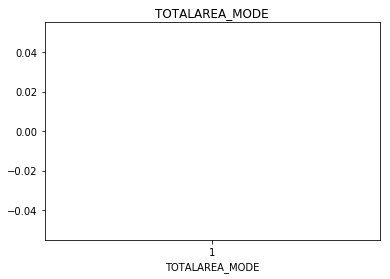

draw boxplot in column  TOTALAREA_MODE


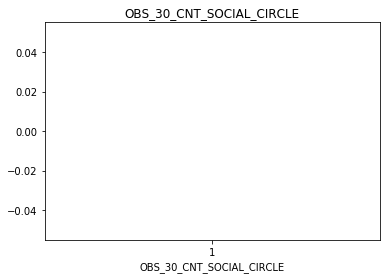

draw boxplot in column  OBS_30_CNT_SOCIAL_CIRCLE


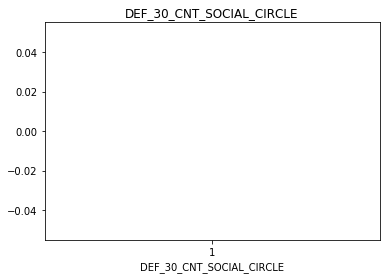

draw boxplot in column  DEF_30_CNT_SOCIAL_CIRCLE


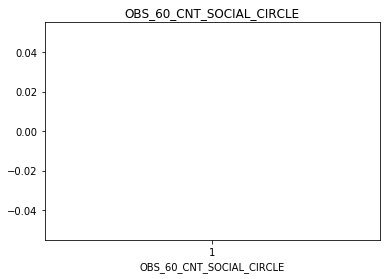

draw boxplot in column  OBS_60_CNT_SOCIAL_CIRCLE


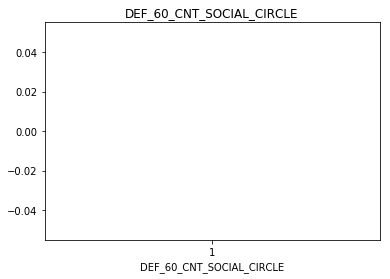

draw boxplot in column  DEF_60_CNT_SOCIAL_CIRCLE


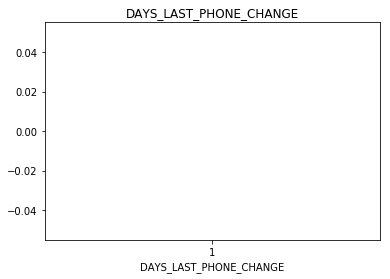

draw boxplot in column  DAYS_LAST_PHONE_CHANGE


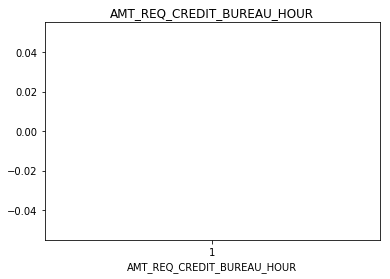

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_HOUR


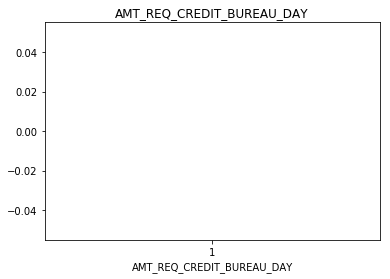

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_DAY


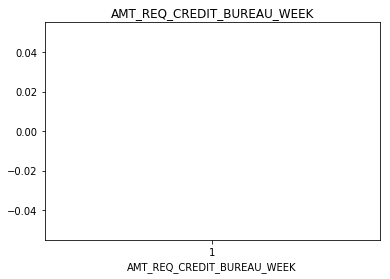

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_WEEK


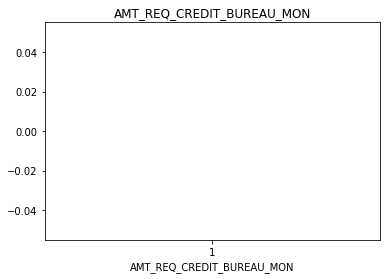

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_MON


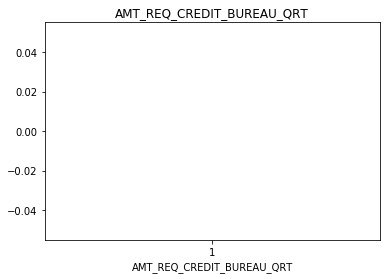

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_QRT


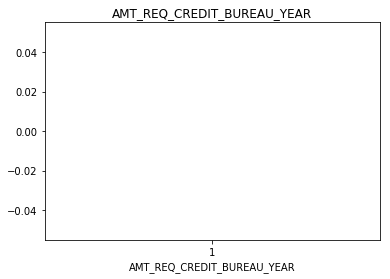

draw boxplot in column  AMT_REQ_CREDIT_BUREAU_YEAR


In [8]:
# 檢視這些欄位的數值範圍
#3.將該資料以箱型圖的方式畫出，找出outlier的數值
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    直方圖
    #app_train[col].describe()
    #ax = app_train[col].hist()
    #ax.set_title(col)
    """
    try:
        plt.boxplot(app_train[col])
        plt.title(col)
        plt.xlabel(col)
        plt.show()
        print("draw boxplot in column ", col)
    except:
        print("Cannot Draw plot", col)

In [54]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
print(app_train['AMT_INCOME_TOTAL'].describe())

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


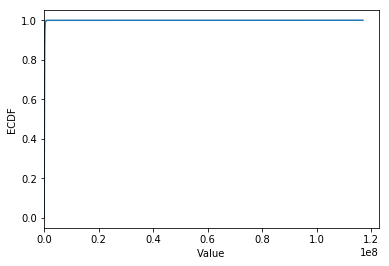

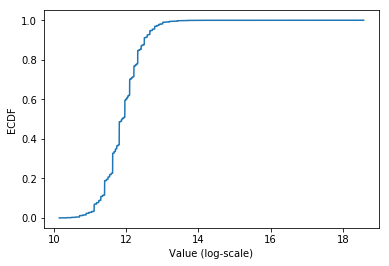

In [58]:
'''
題目到這裡變得很詭異，首先是ECD的應用似乎不是用來找outlier，而這裡看完似乎也是跟outlier沒關係
，其次是題目講的是ECDF但程式碼中是求cdf
'''
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""

def ecdf(data):
    # Number of data points: n
    n = len(data)
 
    # x-data for the ECDF: x
    x_values = np.sort(data) 
    
    # y-data for the ECDF: y
    y_values = np.arange(1, n+1) / n
    
    return x_values,y_values 

hist = np.histogram(app_train['AMT_INCOME_TOTAL'],1000000)
cdf = pd.Series(hist[0], index = (hist[1][:-1]+hist[1][1:])/2).cumsum()

#cdf = np.sort(app_train['AMT_INCOME_TOTAL'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


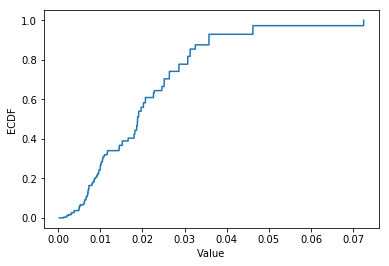

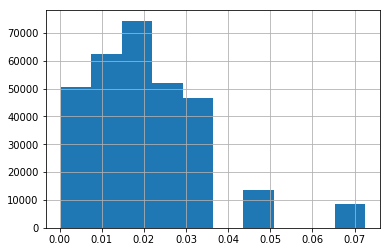

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [59]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
#cdf = 
hist = np.histogram(app_train['REGION_POPULATION_RELATIVE'],1000000)
cdf = pd.Series(hist[0], index = (hist[1][:-1]+hist[1][1:])/2).cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


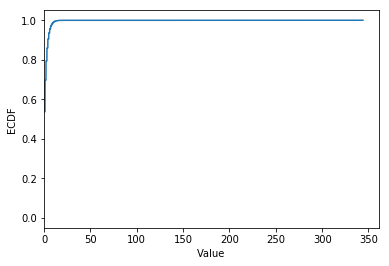

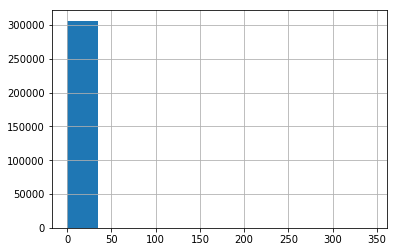

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [60]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
#cdf = 
hist = np.histogram(app_train['OBS_60_CNT_SOCIAL_CIRCLE'][app_train['OBS_60_CNT_SOCIAL_CIRCLE'].notna()],100000)
cdf = pd.Series(hist[0], index = (hist[1][:-1]+hist[1][1:])/2).cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

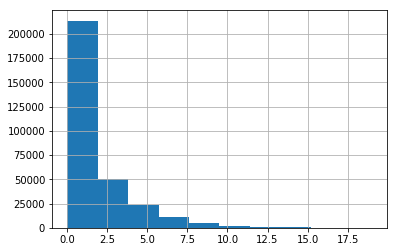

In [61]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()